In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

#format="%m/%d/%Y"
plt.style.use('fivethirtyeight')
df = pd.read_excel('Q3.Resample.xlsx')
df['DateTime'] = pd.to_datetime(df.DateTime)

df.head()

,DateTime,TravelingTime,Distance Load,Avg grade (%),Rainfall Value (mm/m),Rainfall (Hourly),Temp (°C),Humidity (%),Atmos (atm),Wind Direction (°),Wind Speed (m/s),Month,Year,Date,Time,Day
0,2023-07-01 00:00:00,12.116667,4272.0,0.0312,0.0,0.0,25.51,93.80,1005.9,159.6,0.62,7,2023,2023-07-01,00:00:00,Saturday
1,2023-07-01 01:00:00,18.966667,5308.0,0.0312,0.0,0.0,25.21,93.84,1005.2,186.6,1.34,7,2023,2023-07-01,01:00:00,Saturday
2,2023-07-01 02:00:00,19.266667,5074.0,0.0312,0.0,0.0,24.77,94.83,1004.8,194.2,1.37,7,2023,2023-07-01,02:00:00,Saturday
3,2023-07-01 03:00:00,18.933333,5074.0,0.0312,0.0,0.0,24.96,92.83,1004.8,187.5,0.92,7,2023,2023-07-01,03:00:00,Saturday
4,2023-07-01 04:00:00,18.650000,5074.0,0.0312,0.0,0.0,24.54,95.62,1004.8,198.7,1.66,7,2023,2023-07-01,04:00:00,Saturday


In [2]:
# https://medium.com/@fijaya/menjelaskan-algoritma-lstm-secara-sederhana-817373fb9791

In [3]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)

,TravelingTime,Distance Load,Avg grade (%),Rainfall Value (mm/m),Rainfall (Hourly),Temp (°C),Humidity (%),Atmos (atm),Wind Direction (°),Wind Speed (m/s),Month,Year,Date,Time,Day
DateTime,,,,,,,,,,,,,,,
2023-07-01 00:00:00,12.116667,4272.0,0.0312,0.0,0.0,25.51,93.80,1005.9,159.6,0.62,7,2023,2023-07-01,00:00:00,Saturday
2023-07-01 01:00:00,18.966667,5308.0,0.0312,0.0,0.0,25.21,93.84,1005.2,186.6,1.34,7,2023,2023-07-01,01:00:00,Saturday
2023-07-01 02:00:00,19.266667,5074.0,0.0312,0.0,0.0,24.77,94.83,1004.8,194.2,1.37,7,2023,2023-07-01,02:00:00,Saturday
2023-07-01 03:00:00,18.933333,5074.0,0.0312,0.0,0.0,24.96,92.83,1004.8,187.5,0.92,7,2023,2023-07-01,03:00:00,Saturday
2023-07-01 04:00:00,18.650000,5074.0,0.0312,0.0,0.0,24.54,95.62,1004.8,198.7,1.66,7,2023,2023-07-01,04:00:00,Saturday
2023-07-01 05:00:00,19.000000,5042.0,0.0312,0.0,0.0,24.58,95.70,1005.7,198.7,1.55,7,2023,2023-07-01,05:00:00,Saturday
2023-07-01 06:00:00,17.000000,5085.0,0.0312,0.0,0.0,24.96,94.50,1006.6,143.4,0.38,7,2023,2023-07-01,06:00:00,Saturday
2023-07-01 07:00:00,18.366667,4834.0,0.0293,0.0,0.0,26.38,90.11,1007.3,180.3,1.13,7,2023,2023-07-01,07:00:00,Saturday
2023-07-01 08:00:00,14.300000,5846.0,0.0293,0.0,0.0,27.88,85.13,1007.4,30.7,1.34,7,2023,2023-07-01,08:00:00,Saturday


In [4]:
# lakukan resampling berupa downsampling untuk mengambil sampel trip pada tiap jamnya
NewDataSet = dataset.resample('H').max()

In [5]:
NewDataSet.head(2200)

,TravelingTime,Distance Load,Avg grade (%),Rainfall Value (mm/m),Rainfall (Hourly),Temp (°C),Humidity (%),Atmos (atm),Wind Direction (°),Wind Speed (m/s),Month,Year,Date,Time,Day
DateTime,,,,,,,,,,,,,,,
2023-07-01 00:00:00,12.116667,4272.0,0.0312,0.0,0.0,25.51,93.80,1005.9,159.6,0.62,7,2023,2023-07-01,00:00:00,Saturday
2023-07-01 01:00:00,18.966667,5308.0,0.0312,0.0,0.0,25.21,93.84,1005.2,186.6,1.34,7,2023,2023-07-01,01:00:00,Saturday
2023-07-01 02:00:00,19.266667,5074.0,0.0312,0.0,0.0,24.77,94.83,1004.8,194.2,1.37,7,2023,2023-07-01,02:00:00,Saturday
2023-07-01 03:00:00,18.933333,5074.0,0.0312,0.0,0.0,24.96,92.83,1004.8,187.5,0.92,7,2023,2023-07-01,03:00:00,Saturday
2023-07-01 04:00:00,18.650000,5074.0,0.0312,0.0,0.0,24.54,95.62,1004.8,198.7,1.66,7,2023,2023-07-01,04:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 04:00:00,18.850000,4910.0,-0.0165,0.0,0.0,24.61,93.21,1005.6,165.6,1.23,9,2023,2023-09-30,04:00:00,Saturday
2023-09-30 05:00:00,11.000000,4162.0,-0.0165,0.0,0.0,24.52,93.54,1006.1,174.7,0.94,9,2023,2023-09-30,05:00:00,Saturday
2023-09-30 06:00:00,16.500000,3514.0,-0.0255,0.0,0.0,24.45,94.14,1006.6,190.2,0.87,9,2023,2023-09-30,06:00:00,Saturday


In [6]:
NewDataSet[NewDataSet['TravelingTime'].isnull()]

,TravelingTime,Distance Load,Avg grade (%),Rainfall Value (mm/m),Rainfall (Hourly),Temp (°C),Humidity (%),Atmos (atm),Wind Direction (°),Wind Speed (m/s),Month,Year,Date,Time,Day
DateTime,,,,,,,,,,,,,,,


In [7]:
#Get the number of rows and columns in the data set
NewDataSet.shape

(2193, 15)

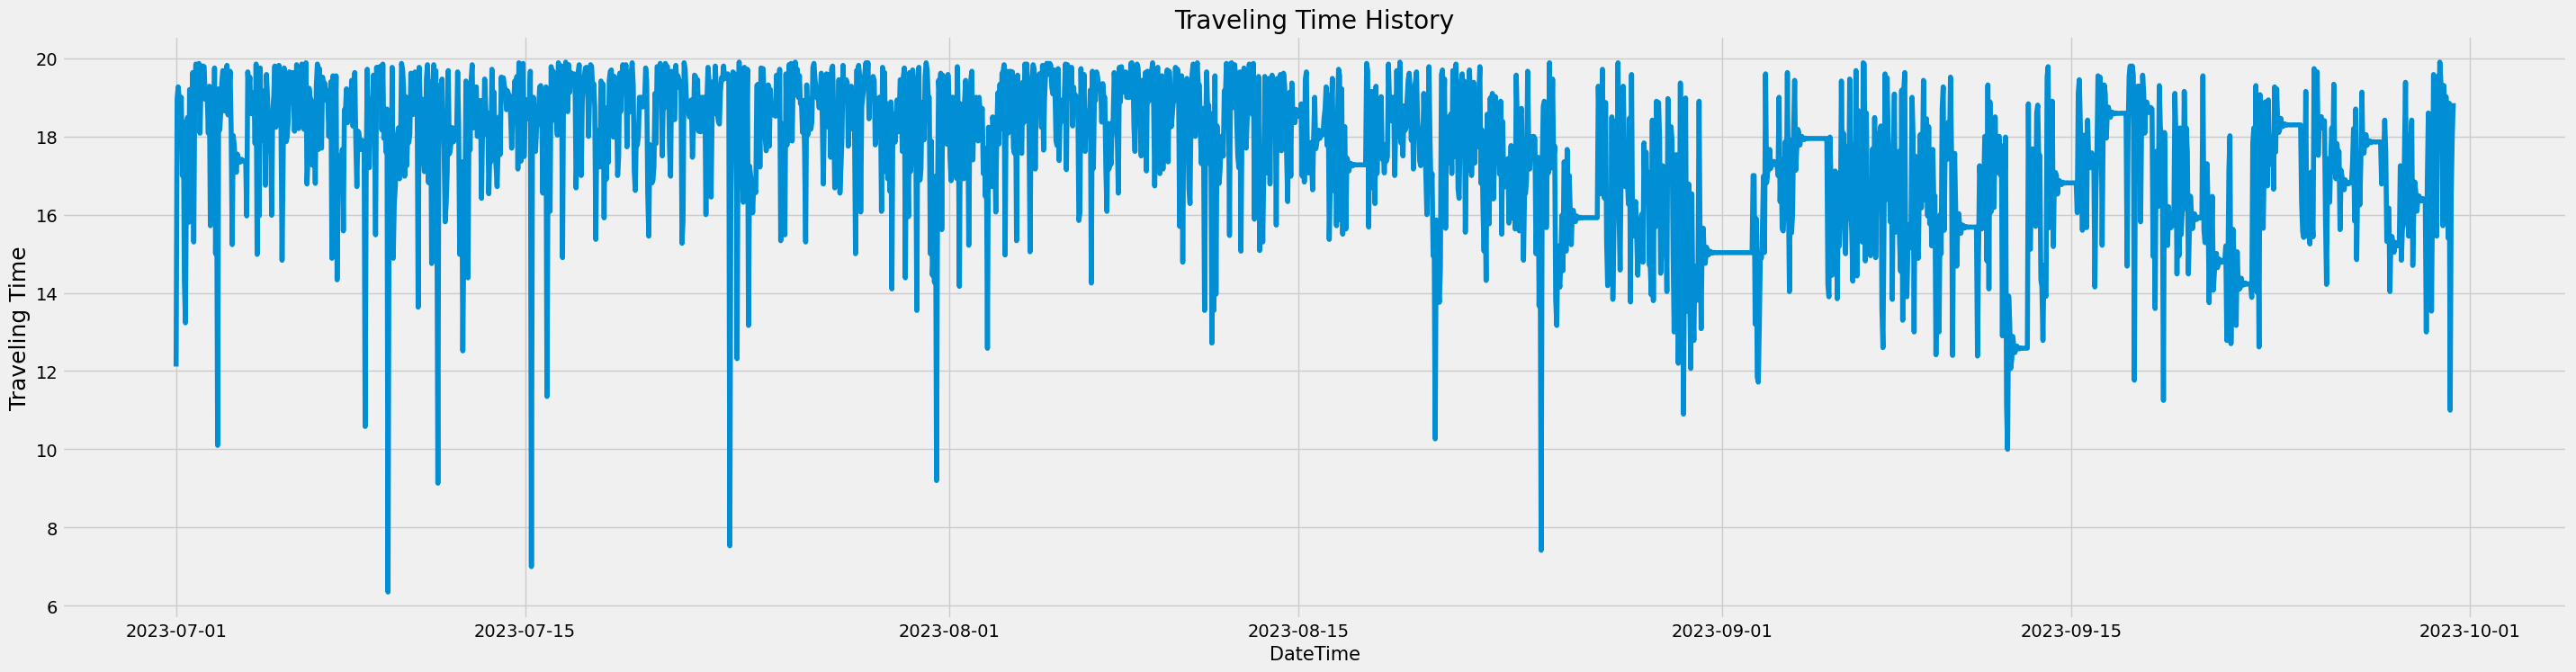

In [8]:
plt.figure(figsize=(32,8)) #ini ukuran diagramnya
plt.title('Traveling Time History') #Beri nama visualnya dengan nama 'Close Price History'

#We give the plot the data (the closing price of our stock)
plt.plot(NewDataSet['TravelingTime'])

#Labelin axis x dan y nya
plt.xlabel('DateTime', fontsize=15)
plt.ylabel('Traveling Time', fontsize=18)

plt.show()

In [9]:
data = NewDataSet.filter(['TravelingTime'])

dataset = data.values

In [10]:
train_start_dt = '2023-07-01 00:00:00'
test_start_dt = '2023-09-25 15:00:00'

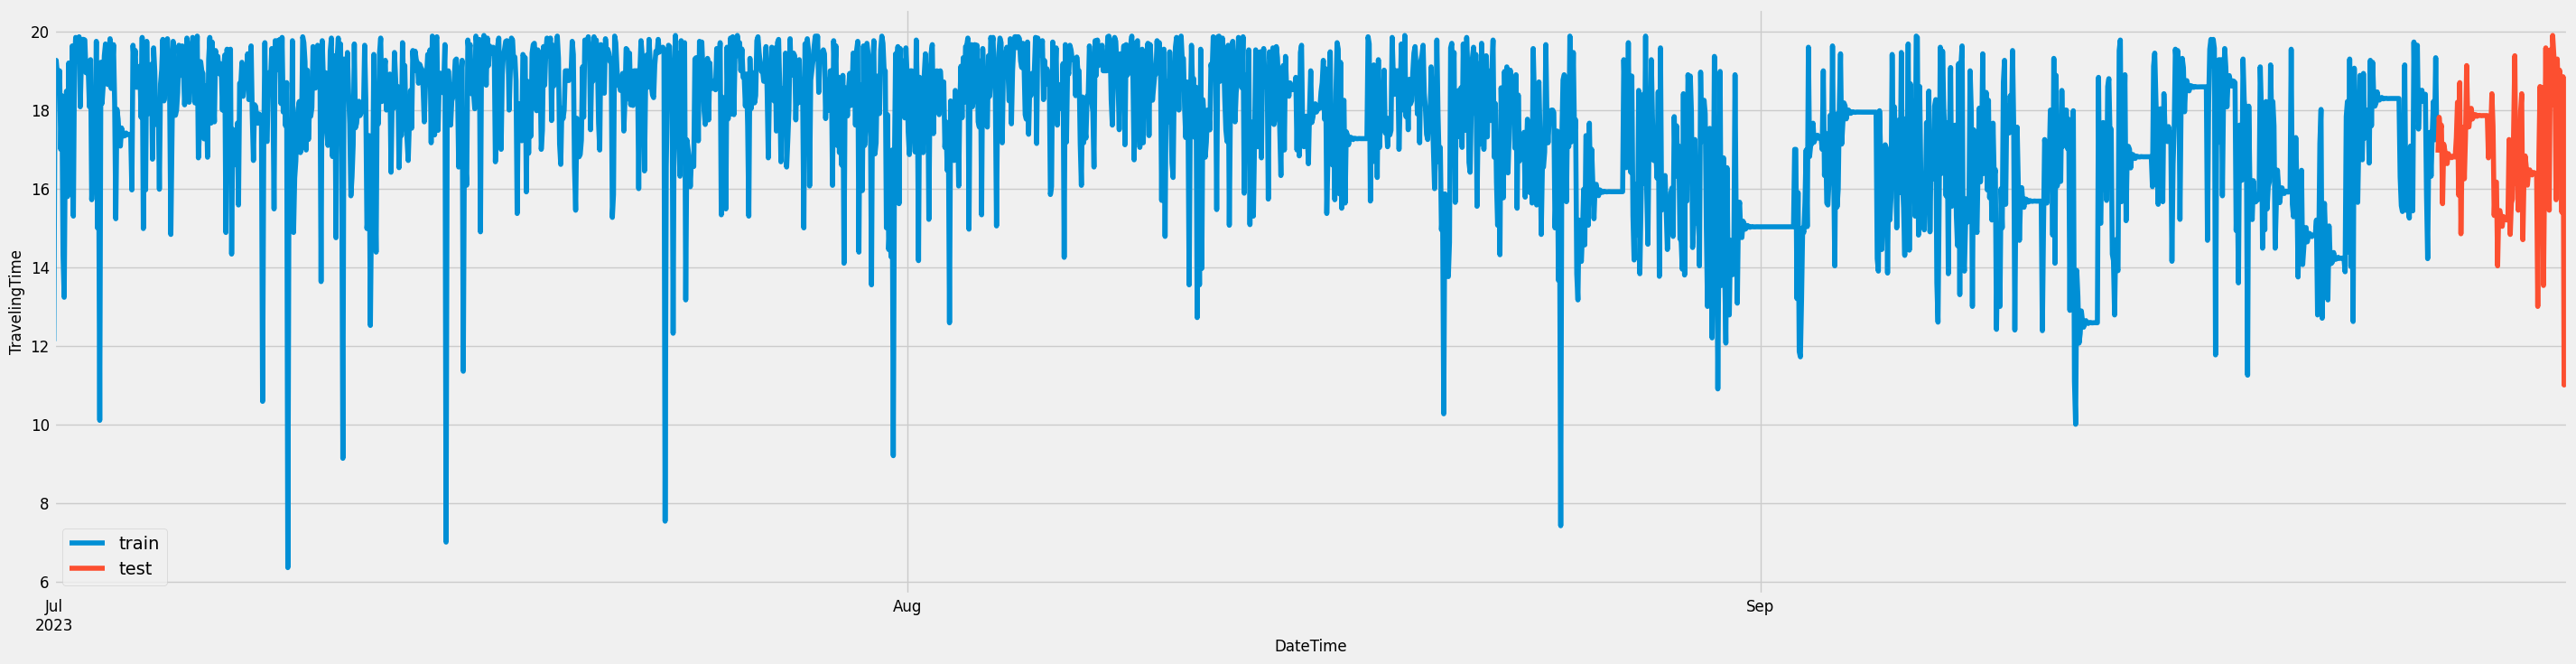

In [11]:
data[(data.index < test_start_dt) & (data.index >= train_start_dt)][['TravelingTime']].rename(columns={'TravelingTime':'train'}) \
    .join(data[test_start_dt:][['TravelingTime']].rename(columns={'TravelingTime':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(32, 8), fontsize=12)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('TravelingTime', fontsize=12)
plt.show()

In [12]:
train = data.copy()[(data.index >= train_start_dt) & (data.index < test_start_dt)][['TravelingTime']]
test = data.copy()[data.index >= test_start_dt][['TravelingTime']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (2079, 1)
Test data shape:  (114, 1)


In [13]:
train.to_excel('C:/Users/ASUS/Document/Documents/.0DataProcessing/#quarterly/1Q1/head train knn.xlsx', index=True)

In [14]:
#scaling train set
scaler = MinMaxScaler(feature_range=(0,1))
train['TravelingTime'] = scaler.fit_transform(train)
train.head(5)

,TravelingTime
DateTime,
2023-07-01 00:00:00,0.425584
2023-07-01 01:00:00,0.931119
2023-07-01 02:00:00,0.953260
2023-07-01 03:00:00,0.928659
2023-07-01 04:00:00,0.907749


In [15]:

#scaling test set
test['TravelingTime'] = scaler.transform(test)
test.head(5)

,TravelingTime
DateTime,
2023-09-25 15:00:00,0.779828
2023-09-25 16:00:00,0.846248
2023-09-25 17:00:00,0.821648
2023-09-25 18:00:00,0.831488
2023-09-25 19:00:00,0.683887


In [16]:

#Converting to numpy
train_data = train.values
test_data = test.values

In [17]:

test_data.shape

(114, 1)

In [18]:
# Selecting the timesteps

timesteps=5

In [19]:
# Converting train data to 2D tensor
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps

array([[0.42558426, 0.93111931, 0.95325953, 0.92865929, 0.90774908],
       [0.93111931, 0.95325953, 0.92865929, 0.90774908, 0.93357934],
       [0.95325953, 0.92865929, 0.90774908, 0.93357934, 0.78597786],
       ...,
       [0.81795818, 0.73554736, 0.81549815, 0.87576876, 0.81119311],
       [0.73554736, 0.81549815, 0.87576876, 0.81119311, 0.95817958],
       [0.81549815, 0.87576876, 0.81119311, 0.95817958, 0.799508  ]])

In [20]:
# Converting test data to 2D tensor

test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(110, 5)

In [21]:
#Select inputs and outputs from training and test data:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2075, 4) (2075, 1)
(110, 4) (110, 1)


In [22]:
from sklearn import neighbors
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [23]:
model1 = neighbors.KNeighborsRegressor(n_neighbors= 11)
model1.fit(x_train, y_train) 



KNeighborsRegressor(n_neighbors=11)

In [24]:
# Create model using RBF kernel
model2 = SVR(kernel='rbf',gamma=0.01, epsilon= 0.1, C=1.0) 
# Fit model on training data
model2.fit(x_train, y_train[:,0])

SVR(gamma=0.01)

In [25]:
# Making predictions fir train set and test set

y_train_pred = model1.predict(x_train).reshape(-1,1)
y_test_pred = model1.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(2075, 1) (110, 1)


In [26]:
# Making predictions fir train set and test set

y_train_pred2 = model2.predict(x_train).reshape(-1,1)
y_test_pred2 = model2.predict(x_test).reshape(-1,1)

print(y_train_pred2.shape, y_test_pred2.shape)

(2075, 1) (110, 1)


In [27]:
y_train_pred

array([[0.87957061],
       [0.86244828],
       [0.89615481],
       ...,
       [0.78040961],
       [0.82534022],
       [0.88082858]])

In [28]:
y_train

array([[0.90774908],
       [0.93357934],
       [0.78597786],
       ...,
       [0.81119311],
       [0.95817958],
       [0.799508  ]])

In [29]:
y_train_pred.shape

(2075, 1)

In [30]:
#  Reverse Scaling the predictions

y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

2075 110


In [31]:
#  Reverse Scaling the predictions

y_train_pred2 = scaler.inverse_transform(y_train_pred2)
y_test_pred2 = scaler.inverse_transform(y_test_pred2)

print(len(y_train_pred2), len(y_test_pred2))

2075 110


In [32]:
y_train_pred2

array([[17.64718651],
       [18.3937473 ],
       [18.40217158],
       ...,
       [17.52546511],
       [17.50994724],
       [17.94846387]])

In [33]:
# Scaling the original values

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

2075 110


In [34]:
y_train

array([[18.65      ],
       [19.        ],
       [17.        ],
       ...,
       [17.34166667],
       [19.33333333],
       [17.18333333]])

In [35]:
y_test

array([[15.61666667],
       [17.13333333],
       [16.9625    ],
       [16.83229167],
       [16.63619792],
       [16.89108073],
       [16.83051758],
       [16.79752197],
       [16.78882955],
       [16.82698746],
       [16.81096414],
       [16.80607578],
       [17.3       ],
       [18.2       ],
       [15.83333333],
       [18.7       ],
       [14.85      ],
       [16.89583333],
       [17.56666667],
       [16.25      ],
       [17.33333333],
       [19.13333333],
       [17.57083333],
       [17.571875  ],
       [17.90234375],
       [18.04459635],
       [17.77241211],
       [17.8228068 ],
       [17.88553975],
       [17.88133876],
       [17.84052436],
       [17.85755242],
       [17.86623882],
       [17.86141359],
       [17.8564323 ],
       [17.86040928],
       [17.8611235 ],
       [17.85984466],
       [17.85945243],
       [17.86020747],
       [16.78333333],
       [17.59070948],
       [17.48333333],
       [18.41666667],
       [17.58333333],
       [15

In [36]:
y_test_pred

array([[17.73930927],
       [18.10073982],
       [17.13977273],
       [16.90700619],
       [16.7367658 ],
       [16.75498405],
       [16.75028985],
       [16.74205401],
       [16.73788413],
       [16.74518214],
       [16.74275382],
       [16.74205401],
       [16.74189326],
       [16.74284408],
       [17.48857718],
       [17.93520856],
       [17.32083333],
       [16.92121212],
       [16.42149621],
       [17.07135417],
       [17.66540601],
       [17.00605506],
       [17.62727273],
       [18.31742424],
       [18.13399621],
       [18.10973011],
       [17.29739765],
       [17.30016436],
       [17.60944653],
       [17.93892143],
       [17.4127794 ],
       [17.27437227],
       [17.60741083],
       [17.94637392],
       [17.94636269],
       [17.60741083],
       [17.94636269],
       [17.94636269],
       [17.94636269],
       [17.94636269],
       [17.94636269],
       [17.93172379],
       [17.54593758],
       [17.32843341],
       [17.9883286 ],
       [16

In [37]:
#KNN

from sklearn.metrics import mean_absolute_error as mae 
rmse = sqrt(mean_squared_error(y_test, y_test_pred))
mae =mae(y_test, y_test_pred)
rmse, mae

(1.578668035224259, 1.0121887482605596)

In [38]:
#SVR
from math import *
from sklearn.metrics import mean_absolute_error as mae
 
rmse = sqrt(mean_squared_error(y_test, y_test_pred2))
mae =mae(y_test, y_test_pred2)
rmse, mae

(1.443714055842789, 0.9988535641421968)

In [39]:
y_train.shape, y_test.shape

((2075, 1), (110, 1))

In [40]:
y_train_pred.shape

(2075, 1)

In [41]:
y_test_pred.shape

(110, 1)

In [42]:
train_timestamps = data[(data.index < test_start_dt) & (data.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = data[test_start_dt:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))


2075 110


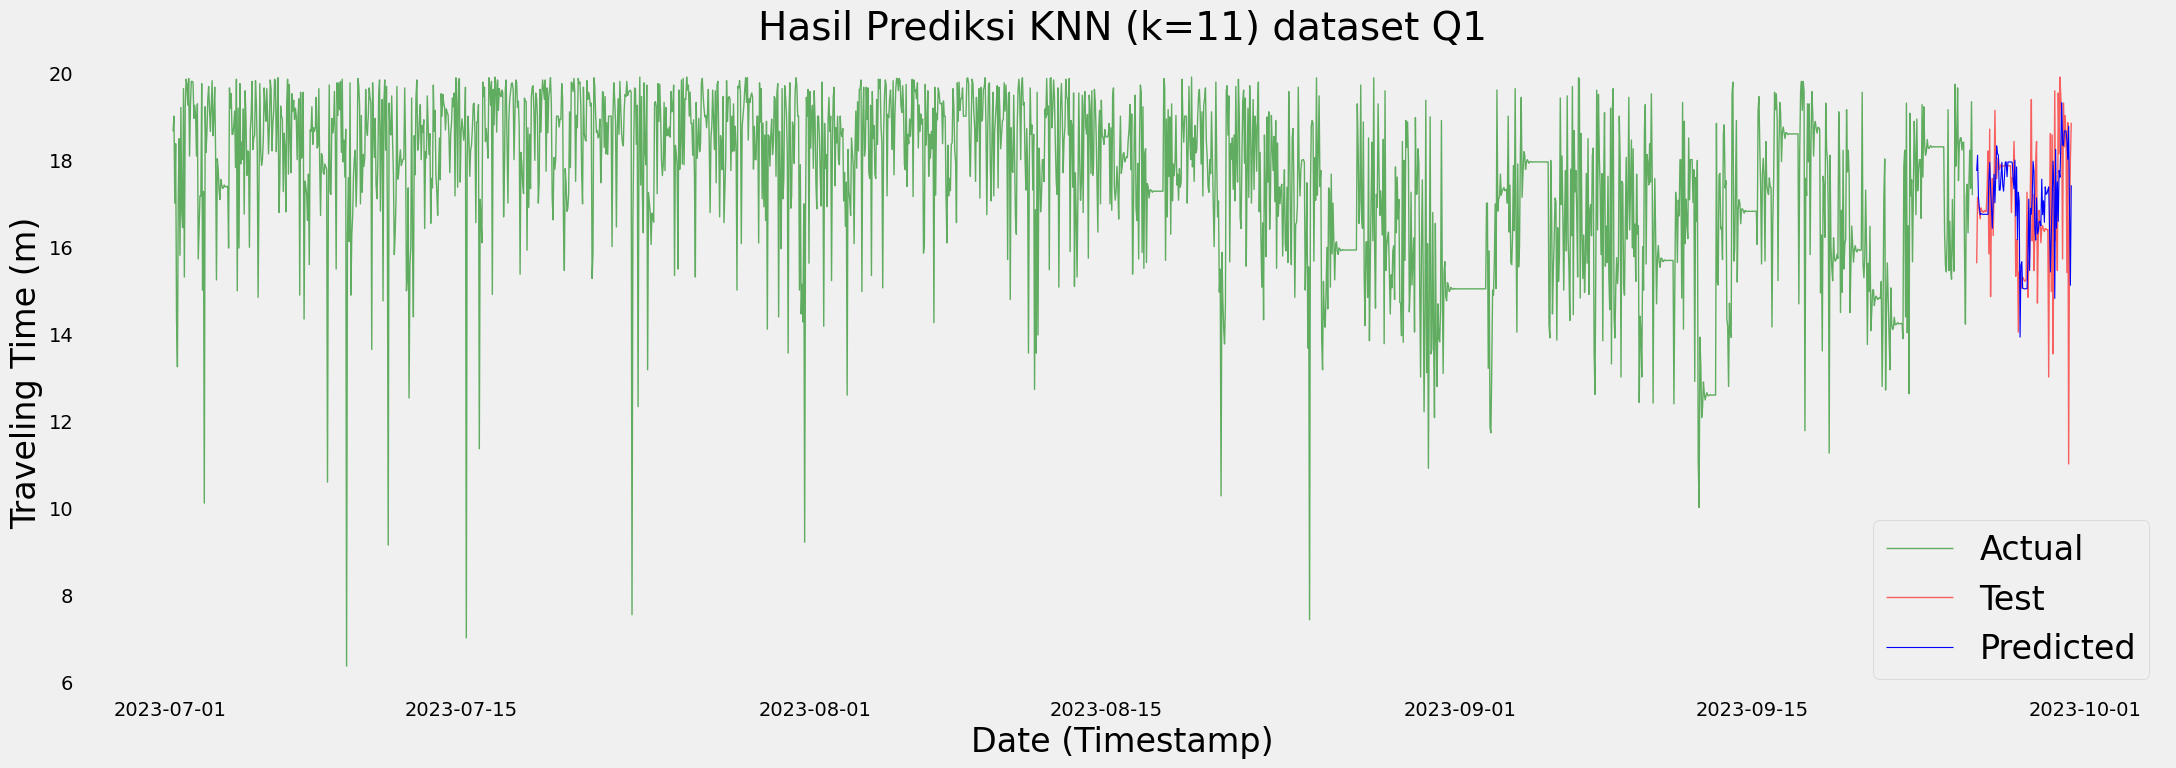

In [43]:
#Visualizing  Actual train set values against predicted train setvalues
plt.figure(figsize=(24,8))
plt.plot(train_timestamps, y_train, color = 'green', linewidth=1.0, alpha = 0.6)
plt.plot(test_timestamps, y_test, color = 'red', linewidth=1.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Test','Predicted'], fontsize=24)
plt.xlabel('Date (Timestamp)', fontsize=24)
plt.ylabel('Traveling Time (m)', fontsize=24)
plt.title("Hasil Prediksi KNN (k=11) dataset Q1", fontsize=28)
plt.grid()
plt.show()

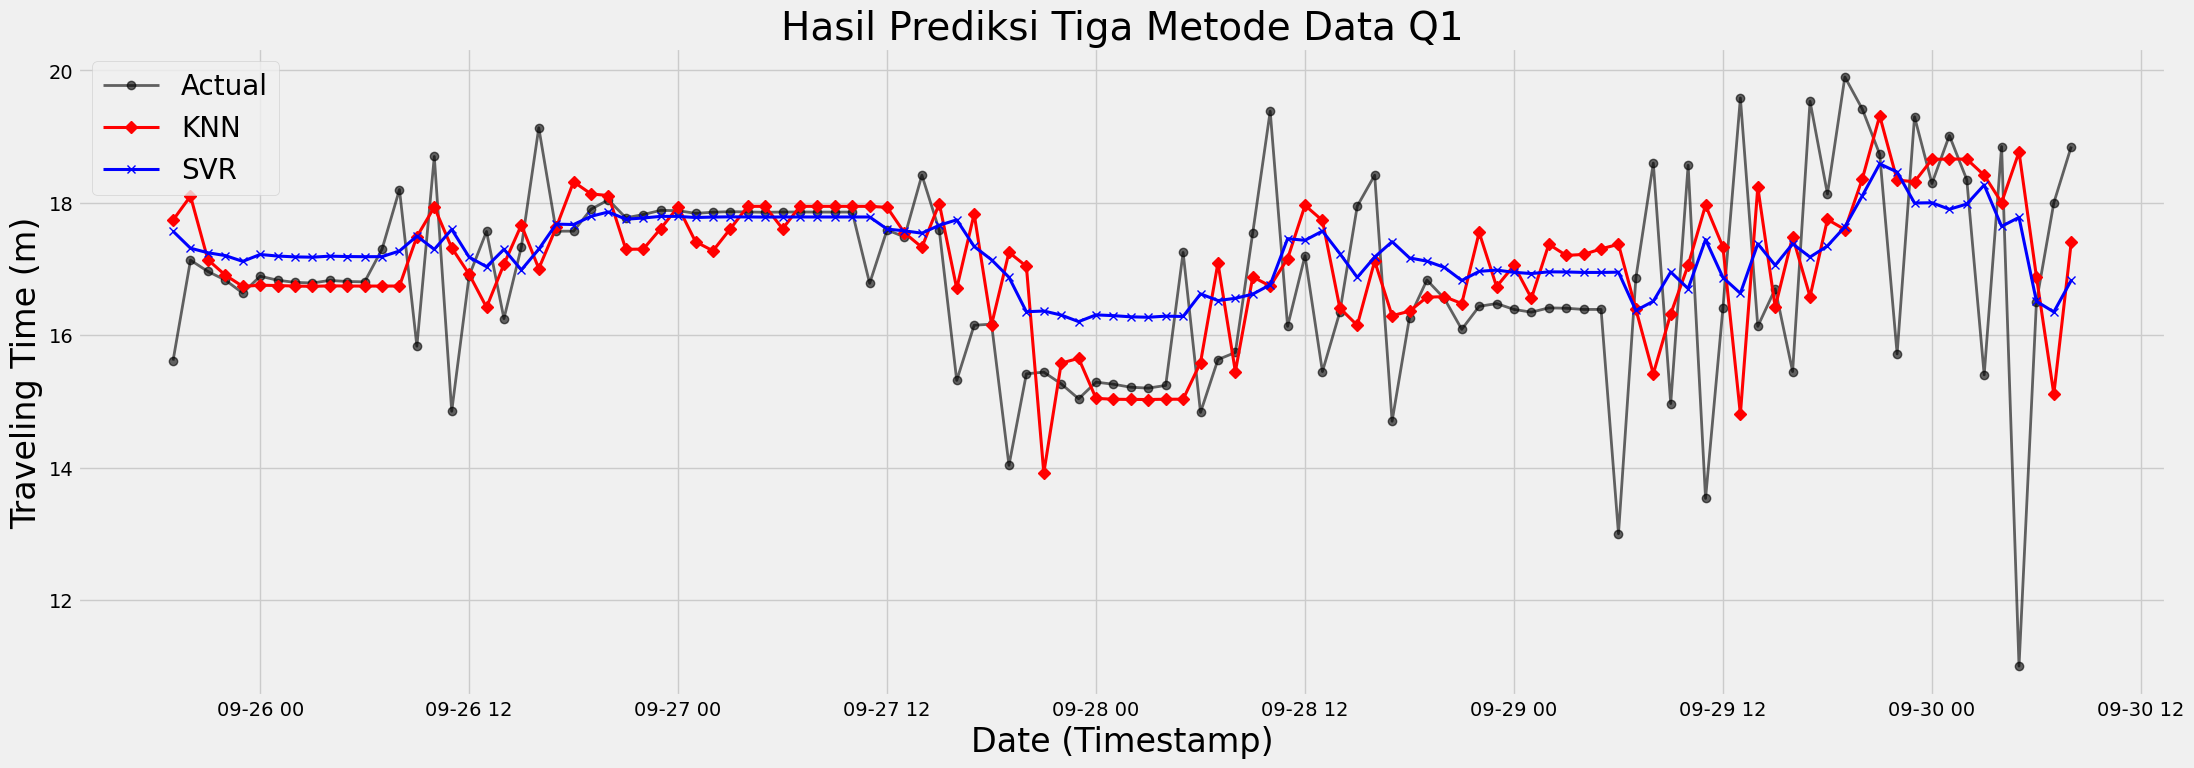

In [44]:
plt.figure(figsize=(24,8))
plt.plot(test_timestamps, y_test, color = 'black', linewidth=2.0, alpha = 0.6, marker='o', markersize=6)
plt.plot(test_timestamps, y_test_pred, color = 'red', linewidth=2.2, marker='D', markersize=6)
plt.plot(test_timestamps, y_test_pred2, color = 'blue', linewidth=2.2, marker='x', markersize=6)
plt.legend(['Actual','KNN', 'SVR'], fontsize=20)
plt.xlabel('Date (Timestamp)', fontsize=24)
plt.ylabel('Traveling Time (m)', fontsize=24)
plt.title("Hasil Prediksi Tiga Metode Data Q1", fontsize=28)
plt.show()

In [45]:

# Report Accuracy metrics for training
def forecast_accuracy(forecast, actual):
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100 # MAPE
  me = np.mean(forecast - actual) # ME
  mae = np.mean(np.abs(forecast - actual)) # MAE
  mpe = np.mean((forecast - actual)/actual) # MPE
  rmse = np.mean((forecast - actual)**2)**.5 # RMSE
  u_statistics = (np.mean((forecast - actual)**2)**.5)/((np.mean((forecast)**2)**.5)*(np.mean((actual)**2)**.5)) # Theils U Statistics
  return({'MAPE':mape, 'ME':me, 'MAE': mae, 'MPE': mpe, 'RMSE':rmse,'Theils U Statistics':u_statistics})

In [46]:
forecast_accuracy(y_test_pred, y_test)

{'MAPE': 6.3357440583826845,
 'ME': 0.182254417662256,
 'MAE': 1.0121887482605596,
 'MPE': 0.018141045654895525,
 'RMSE': 1.578668035224259,
 'Theils U Statistics': 0.005436905357785817}

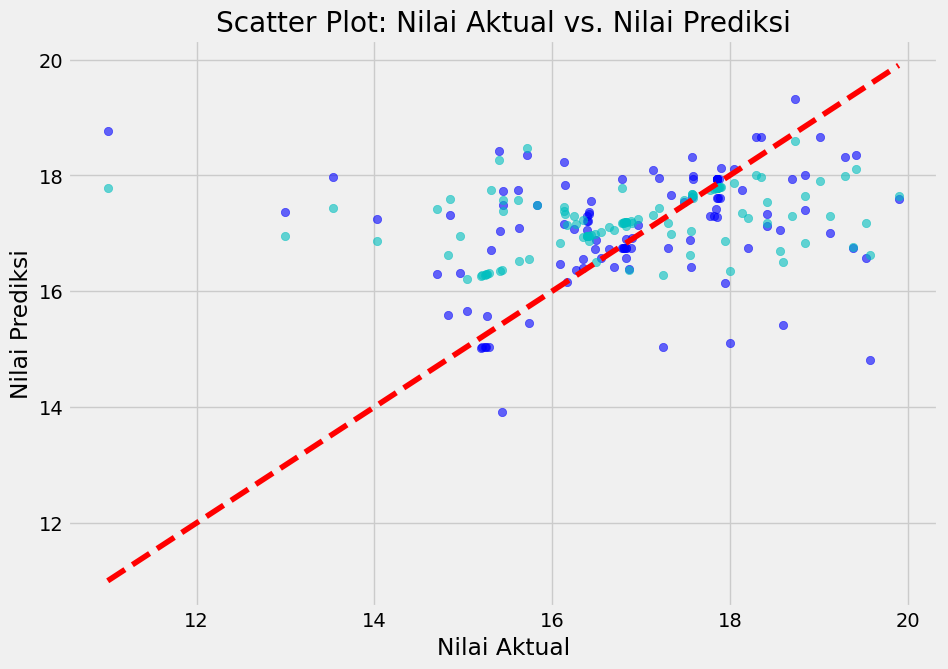

In [47]:
# Scatter Plot: Nilai Aktual vs. Nilai Prediksi
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
plt.scatter(y_test, y_test_pred2, alpha=0.6, color = 'c')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot: Nilai Aktual vs. Nilai Prediksi')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()

In [48]:
data = NewDataSet.filter(['TravelingTime'])

dataset = data.values

training_data_len = math.ceil( len(dataset) * 0.949 )

training_data_len

2082

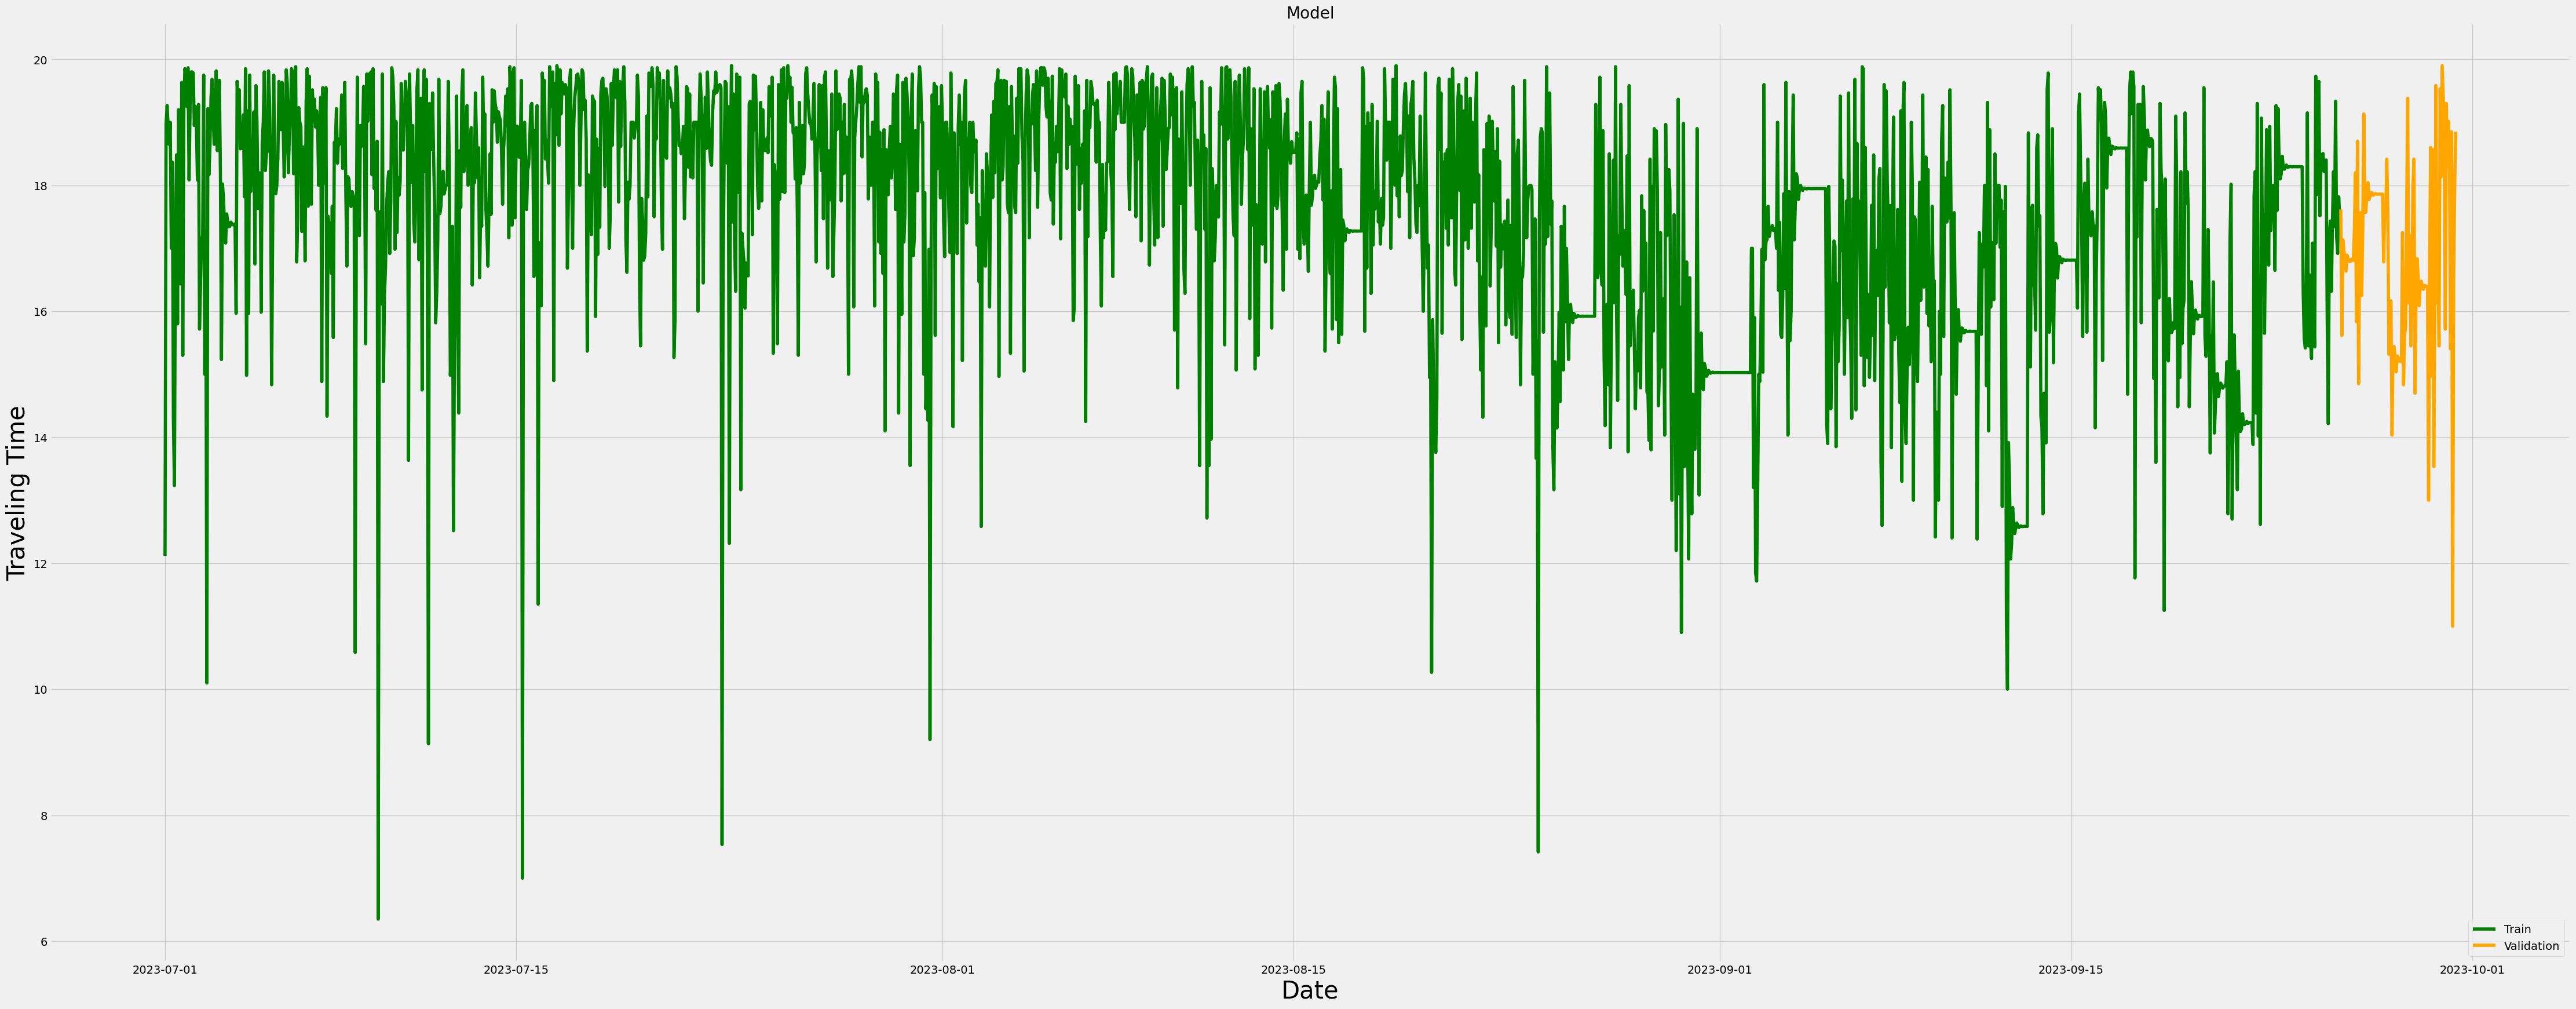

In [49]:
train = data[:training_data_len]
valid = data[training_data_len:]


plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)

plt.plot(train['TravelingTime'], color='green', label='Actual')
plt.plot(valid['TravelingTime'], color="orange", label='validation')

plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [50]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

np.set_printoptions(threshold=np.inf)
print(scaled_data)

[[0.42558426]
 [0.93111931]
 [0.95325953]
 [0.92865929]
 [0.90774908]
 [0.93357934]
 [0.78597786]
 [0.88683887]
 [0.58671587]
 [0.50799508]
 [0.799508  ]
 [0.89544895]
 [0.69741697]
 [0.94833948]
 [0.77121771]
 [0.74415744]
 [0.9803198 ]
 [0.66051661]
 [0.94833948]
 [0.99630996]
 [0.98892989]
 [0.95202952]
 [0.99753998]
 [0.86592866]
 [0.95110701]
 [0.99261993]
 [0.99261993]
 [0.99138991]
 [0.9298893 ]
 [0.95202952]
 [0.93357934]
 [0.86592866]
 [0.95448954]
 [0.69126691]
 [0.74538745]
 [0.79827798]
 [0.79735547]
 [0.98892989]
 [0.63837638]
 [0.80573493]
 [0.27675277]
 [0.9495695 ]
 [0.87207872]
 [0.90528905]
 [0.96186962]
 [0.98400984]
 [0.94341943]
 [0.90774908]
 [0.94926199]
 [0.99384994]
 [0.900369  ]
 [0.93357934]
 [0.98277983]
 [0.87330873]
 [0.65559656]
 [0.86131611]
 [0.84325031]
 [0.80836793]
 [0.79213273]
 [0.82626677]
 [0.81750443]
 [0.81106796]
 [0.81174297]
 [0.81664553]
 [0.81424023]
 [0.81342417]
 [0.81401323]
 [0.81458079]
 [0.7097171 ]
 [0.98154982]
 [0.94710947]
 [0.97

In [51]:
train_data = scaled_data[0:training_data_len, :] 

print(train_data)

[[0.42558426]
 [0.93111931]
 [0.95325953]
 [0.92865929]
 [0.90774908]
 [0.93357934]
 [0.78597786]
 [0.88683887]
 [0.58671587]
 [0.50799508]
 [0.799508  ]
 [0.89544895]
 [0.69741697]
 [0.94833948]
 [0.77121771]
 [0.74415744]
 [0.9803198 ]
 [0.66051661]
 [0.94833948]
 [0.99630996]
 [0.98892989]
 [0.95202952]
 [0.99753998]
 [0.86592866]
 [0.95110701]
 [0.99261993]
 [0.99261993]
 [0.99138991]
 [0.9298893 ]
 [0.95202952]
 [0.93357934]
 [0.86592866]
 [0.95448954]
 [0.69126691]
 [0.74538745]
 [0.79827798]
 [0.79735547]
 [0.98892989]
 [0.63837638]
 [0.80573493]
 [0.27675277]
 [0.9495695 ]
 [0.87207872]
 [0.90528905]
 [0.96186962]
 [0.98400984]
 [0.94341943]
 [0.90774908]
 [0.94926199]
 [0.99384994]
 [0.900369  ]
 [0.93357934]
 [0.98277983]
 [0.87330873]
 [0.65559656]
 [0.86131611]
 [0.84325031]
 [0.80836793]
 [0.79213273]
 [0.82626677]
 [0.81750443]
 [0.81106796]
 [0.81174297]
 [0.81664553]
 [0.81424023]
 [0.81342417]
 [0.81401323]
 [0.81458079]
 [0.7097171 ]
 [0.98154982]
 [0.94710947]
 [0.97

In [52]:
x_train3 = []
y_train3 = []

for i in range(60, len(train_data)):
  x_train3.append(train_data[i-60:i, 0]) 
  y_train3.append(train_data[i, 0]) #y_train diisi value ke 61 (60)
  if i <= 60:
    print(x_train3)
    print(y_train3)
    print()

[array([0.42558426, 0.93111931, 0.95325953, 0.92865929, 0.90774908,
       0.93357934, 0.78597786, 0.88683887, 0.58671587, 0.50799508,
       0.799508  , 0.89544895, 0.69741697, 0.94833948, 0.77121771,
       0.74415744, 0.9803198 , 0.66051661, 0.94833948, 0.99630996,
       0.98892989, 0.95202952, 0.99753998, 0.86592866, 0.95110701,
       0.99261993, 0.99261993, 0.99138991, 0.9298893 , 0.95202952,
       0.93357934, 0.86592866, 0.95448954, 0.69126691, 0.74538745,
       0.79827798, 0.79735547, 0.98892989, 0.63837638, 0.80573493,
       0.27675277, 0.9495695 , 0.87207872, 0.90528905, 0.96186962,
       0.98400984, 0.94341943, 0.90774908, 0.94926199, 0.99384994,
       0.900369  , 0.93357934, 0.98277983, 0.87330873, 0.65559656,
       0.86131611, 0.84325031, 0.80836793, 0.79213273, 0.82626677])]
[0.8175044323685445]



In [53]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(2022, 60, 1)

In [54]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [55]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train3, y_train3, batch_size=32, epochs=100, verbose=2)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
64/64 - 18s - 278ms/step - loss: 0.0523
Epoch 2/100
64/64 - 5s - 81ms/step - loss: 0.0140
Epoch 3/100
64/64 - 6s - 89ms/step - loss: 0.0139
Epoch 4/100
64/64 - 6s - 92ms/step - loss: 0.0135
Epoch 5/100
64/64 - 10s - 149ms/step - loss: 0.0136
Epoch 6/100
64/64 - 5s - 84ms/step - loss: 0.0141
Epoch 7/100
64/64 - 6s - 88ms/step - loss: 0.0134
Epoch 8/100
64/64 - 6s - 92ms/step - loss: 0.0137
Epoch 9/100
64/64 - 5s - 84ms/step - loss: 0.0137
Epoch 10/100
64/64 - 6s - 89ms/step - loss: 0.0134
Epoch 11/100
64/64 - 6s - 88ms/step - loss: 0.0135
Epoch 12/100
64/64 - 6s - 91ms/step - loss: 0.0137
Epoch 13/100
64/64 - 6s - 91ms/step - loss: 0.0136
Epoch 14/100
64/64 - 5s - 86ms/step - loss: 0.0138
Epoch 15/100
64/64 - 6s - 90ms/step - loss: 0.0134
Epoch 16/100
64/64 - 6s - 89ms/step - loss: 0.0135
Epoch 17/100
64/64 - 6s - 98ms/step - loss: 0.0133
Epoch 18/100
64/64 - 6s - 88ms/step - loss: 0.0138
Epoch 19/100
64/64 - 11s - 167ms/step - loss: 0.0134
Epoch 20/100
64/64 - 6s - 87ms/ste

In [56]:
test_data = scaled_data[training_data_len - 60:]

x_test3 = []
y_test3 = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test3.append(test_data[i-60:i, 0])

x_test3 = np.array(x_test3)
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))
x_test3.shape

(111, 60, 1)

In [57]:
predictions3 = model.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)
predictions3

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


array([[17.846308],
       [17.841415],
       [17.51918 ],
       [17.471897],
       [17.451065],
       [17.427086],
       [17.378834],
       [17.380564],
       [17.38006 ],
       [17.373877],
       [17.365131],
       [17.362223],
       [17.35603 ],
       [17.347513],
       [17.42085 ],
       [17.64126 ],
       [17.433592],
       [17.682343],
       [17.298063],
       [17.235926],
       [17.348848],
       [17.25212 ],
       [17.325325],
       [17.717257],
       [17.796558],
       [17.802002],
       [17.837915],
       [17.888132],
       [17.880001],
       [17.871965],
       [17.876047],
       [17.88155 ],
       [17.881817],
       [17.887045],
       [17.896158],
       [17.906599],
       [17.917547],
       [17.929504],
       [17.942461],
       [17.95526 ],
       [17.967655],
       [17.98005 ],
       [17.819017],
       [17.806988],
       [17.803934],
       [17.962631],
       [17.970001],
       [17.598019],
       [17.38894 ],
       [17.254852],


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21660\276240779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions3


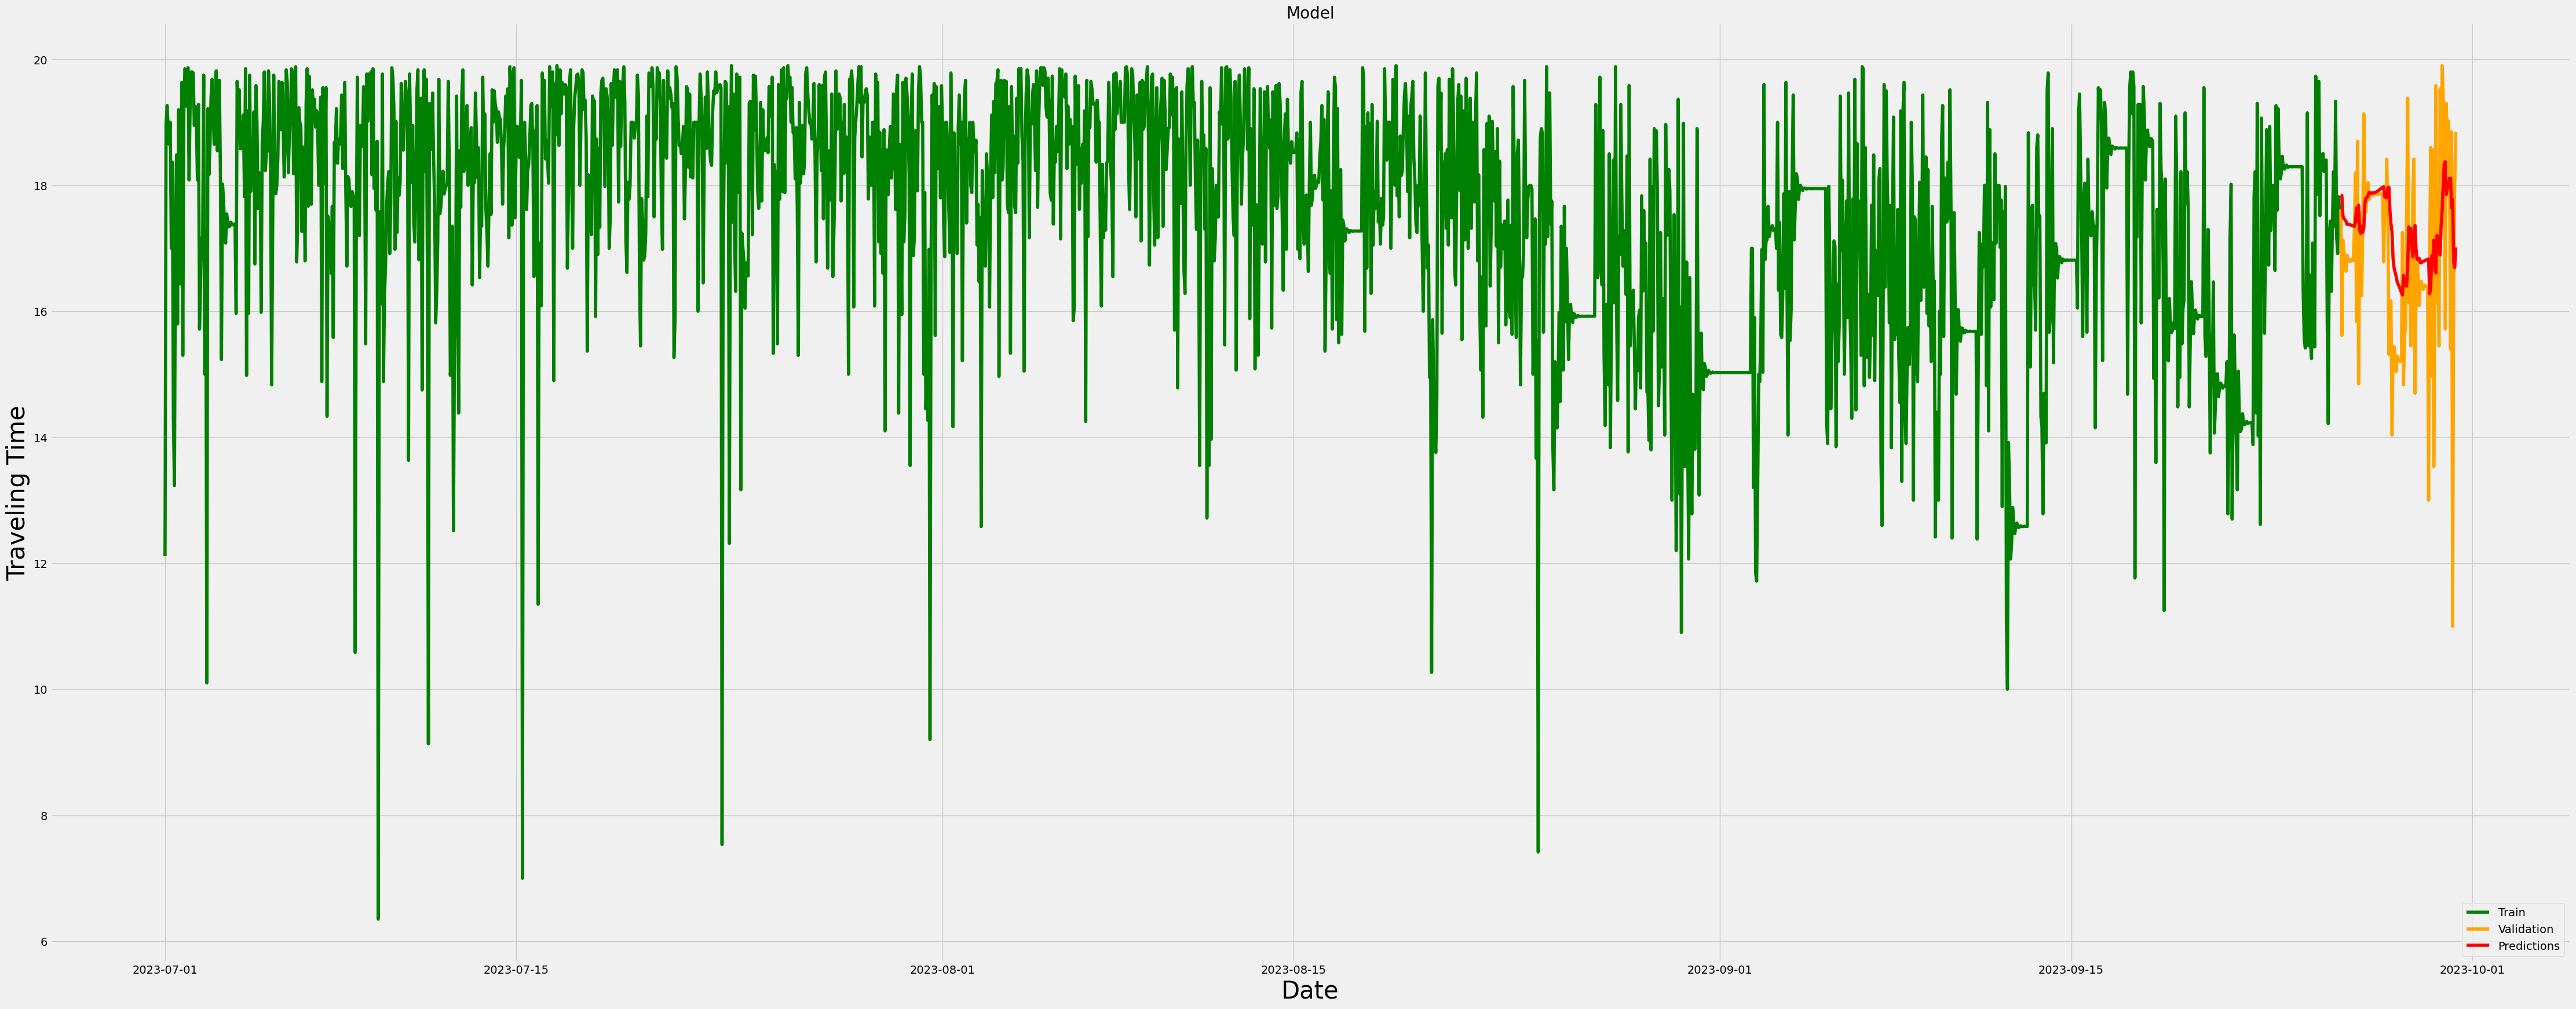

In [58]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions3

plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)

plt.plot(train['TravelingTime'], color='green', label='Actual')
plt.plot(valid['TravelingTime'], color="orange", label='validation')
plt.plot(valid['Predictions'], color="red", label='Prediction')

plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21660\2797276460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions3


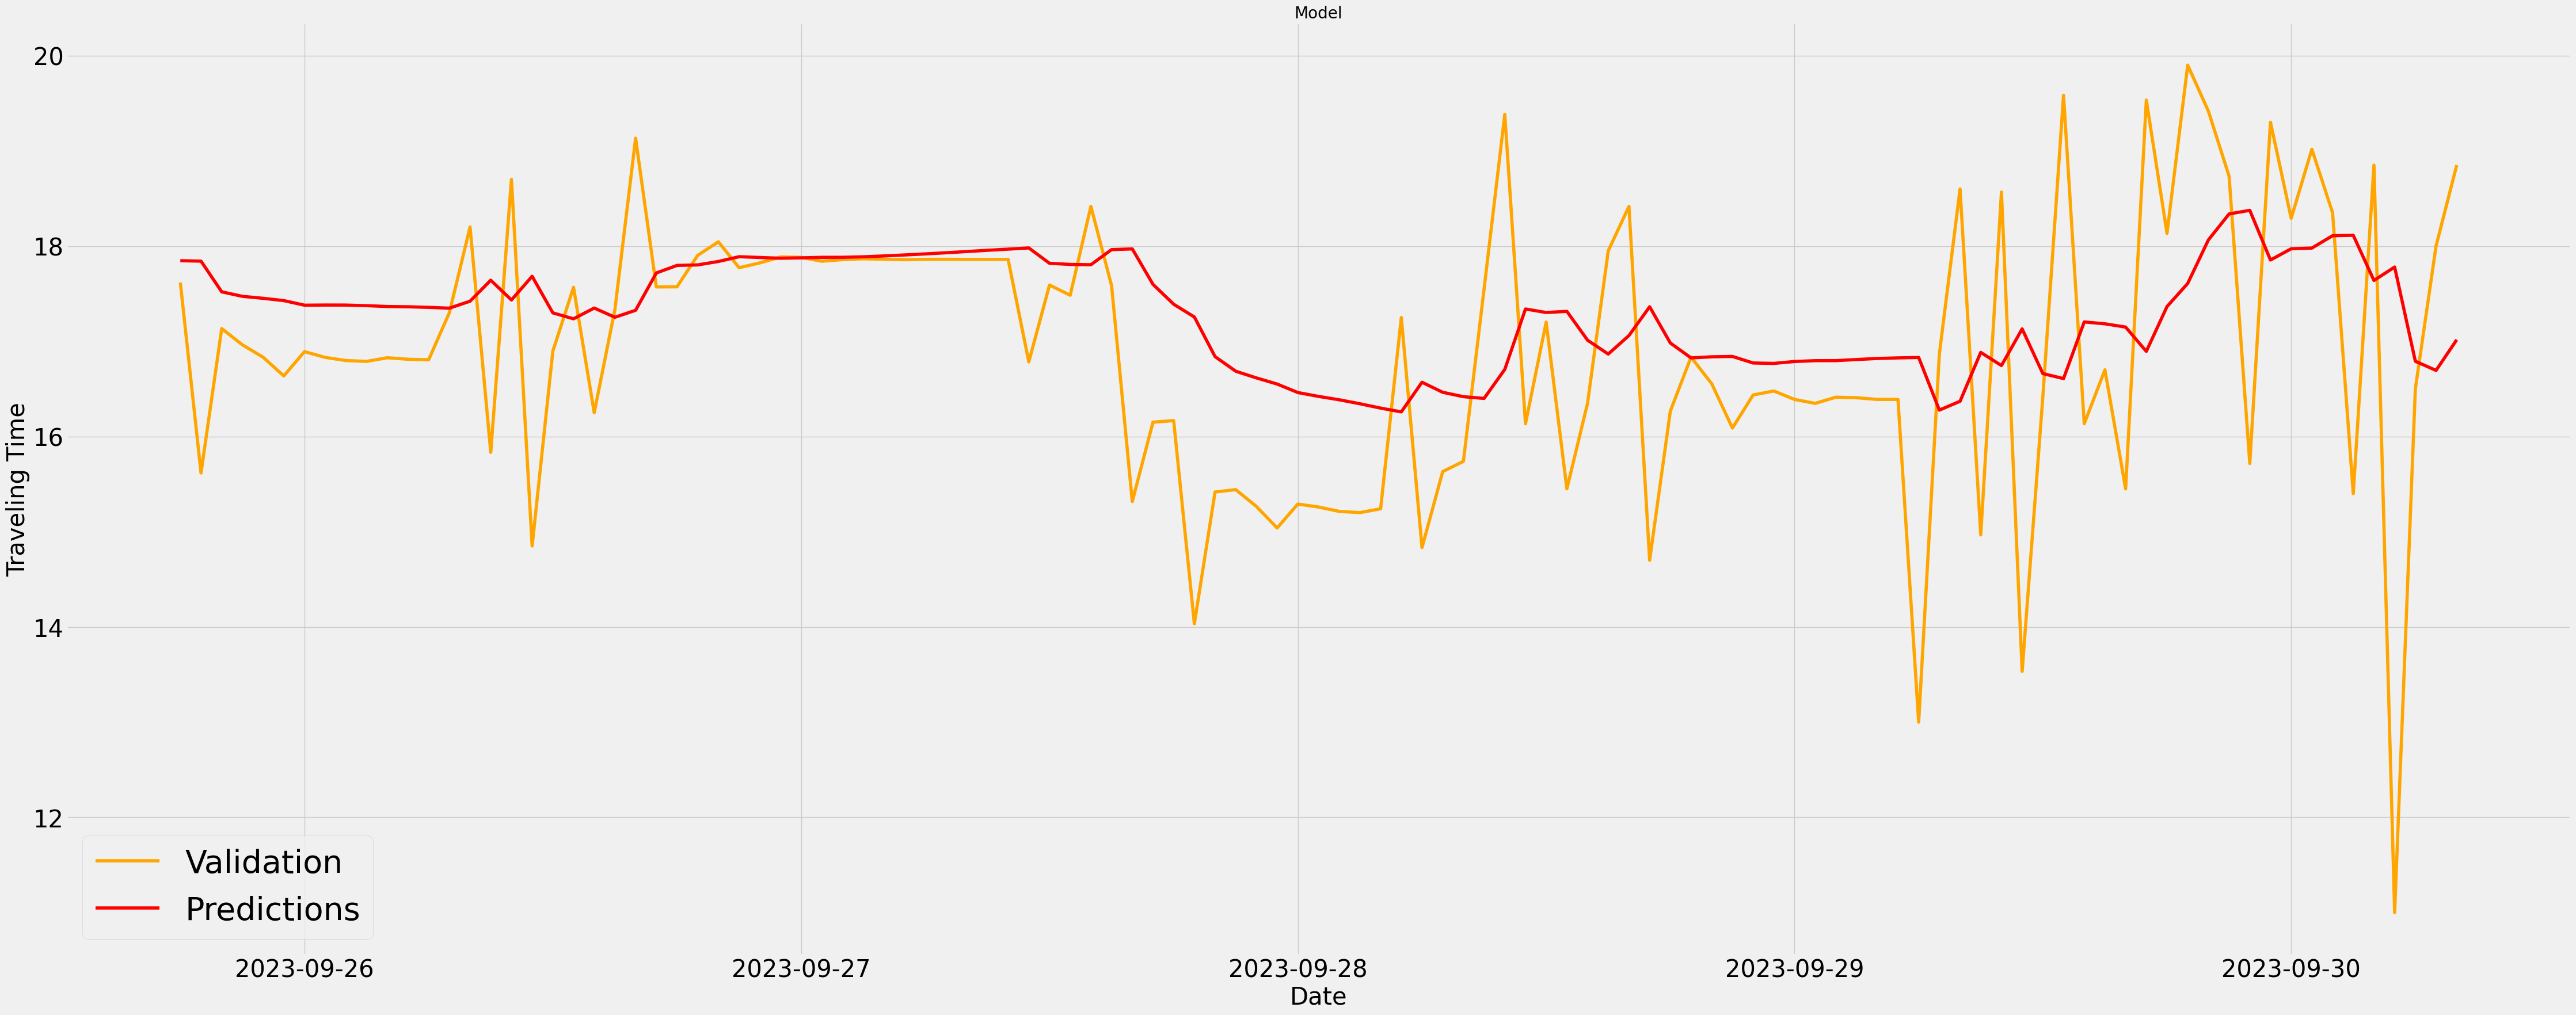

In [59]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions3

plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.plot(valid['TravelingTime'], color="orange", label='validation')
plt.plot(valid['Predictions'], color="red", label='Prediction')

plt.legend([ 'Validation', 'Predictions'], fontsize="40", loc ="lower left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


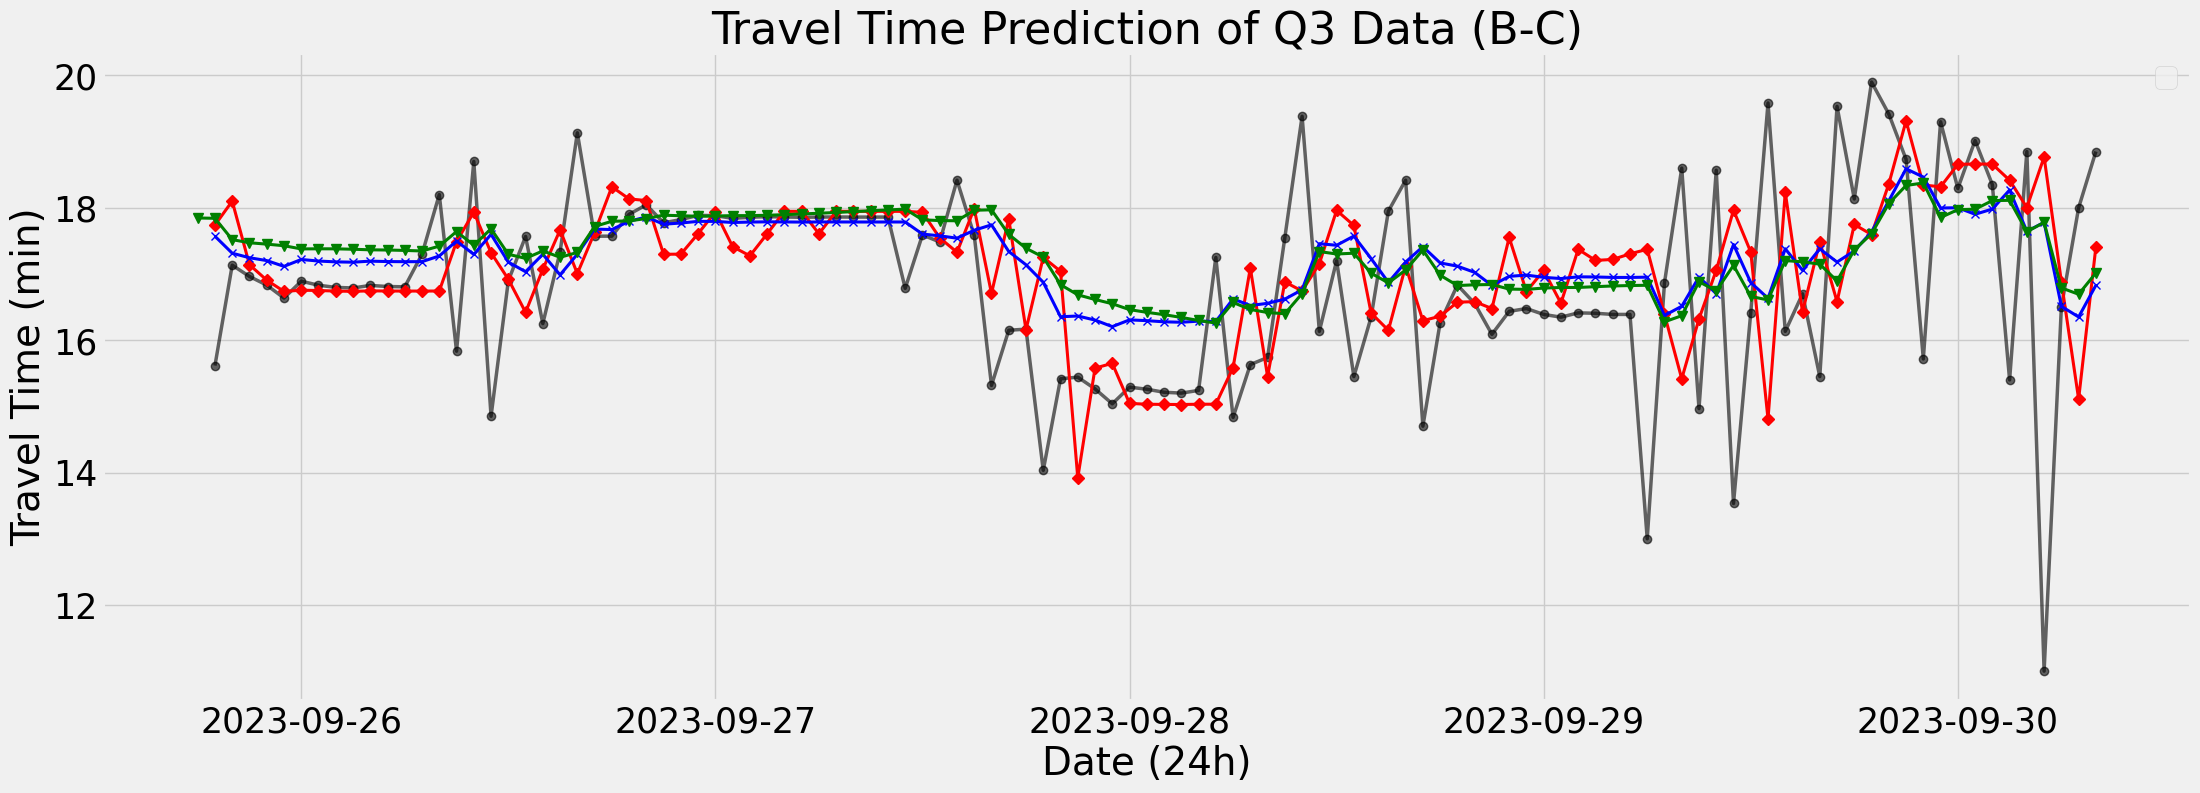

In [65]:
plt.figure(figsize=(24,8))
plt.plot(test_timestamps, y_test, color = 'black', linewidth=2.5, alpha = 0.6, marker='o', markersize=6)
plt.plot(test_timestamps, y_test_pred, color = 'red', linewidth=2.2, marker='D', markersize=6)
plt.plot(test_timestamps, y_test_pred2, color = 'blue', linewidth=2.2, marker='x', markersize=6)
plt.plot(valid['Predictions'], color="g", linewidth=2.2, marker='v', markersize=7)
#plt.legend(['Aktual','KNN', 'SVR', 'LSTM'], fontsize=20)


plt.legend(fontsize=20)
plt.xlabel('Date (24h)', fontsize=28)
plt.ylabel('Travel Time (min)', fontsize=28)
plt.title("Travel Time Prediction of Q3 Data (B-C)", fontsize=32)
# Mengatur ukuran font untuk label sumbu x dan y
plt.tick_params(axis='x', labelsize=25)  # Ukuran font untuk label sumbu x
plt.tick_params(axis='y', labelsize=25)  # Ukuran font untuk label sumbu y
plt.show()

In [61]:
#KNN

from sklearn.metrics import mean_absolute_error as mae 
rmse = sqrt(mean_squared_error(y_test, y_test_pred))
mae =mae(y_test, y_test_pred)
range_data = y_test.max() - y_test.min()
rmse_percent = (rmse / range_data) * 100
print('RMSE:', rmse, 'MAE:', mae, "RMSE as percentage of data range:", rmse_percent, "%")

RMSE: 1.578668035224259 MAE: 1.0121887482605596 RMSE as percentage of data range: 17.737843092407562 %


In [62]:
#SVR
from math import *
from sklearn.metrics import mean_absolute_error as mae
 
rmse2 = sqrt(mean_squared_error(y_test, y_test_pred2))
mae2 =mae(y_test, y_test_pred2)
range_data2 = y_test.max() - y_test.min()
rmse_percent2 = (rmse2 / range_data) * 100
print('RMSE:', rmse2, 'MAE:', mae2, "RMSE as percentage of data range:", rmse_percent2, "%")

RMSE: 1.443714055842789 MAE: 0.9988535641421968 RMSE as percentage of data range: 16.22150624542474 %


In [63]:
#LSTM
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error
import math
from numpy import sqrt 

rmse3 = sqrt(mean_squared_error(y_test3, predictions3))
mae3 =mae(y_test3, predictions3)
range_data3 = y_test3.max() - y_test3.min()
rmse_percent3 = (rmse3 / range_data) * 100
print('RMSE:', rmse3, 'MAE:', mae3, "RMSE as percentage of data range:", rmse_percent3, "%")

RMSE: 1.4521064839154956 MAE: 1.014946764458624 RMSE as percentage of data range: 16.315803190061896 %
